<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [2]:
# Write your code here
summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
summary['Non-Null Count'] = df.count()
summary['Missing Values'] = df.isnull().sum()
with pd.option_context('display.max_rows', 200):
    print(summary)

                               Data Type  Non-Null Count  Missing Values
ResponseId                         int64           65437               0
MainBranch                        object           65437               0
Age                               object           65437               0
Employment                        object           65437               0
RemoteWork                        object           54806           10631
Check                             object           65437               0
CodingActivities                  object           54466           10971
EdLevel                           object           60784            4653
LearnCode                         object           60488            4949
LearnCodeOnline                   object           49237           16200
TechDoc                           object           40897           24540
YearsCode                         object           59869            5568
YearsCodePro                      object           

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [8]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [11]:
# Write your code here
# there appears to be no inconsistent or irrelevant entries
with pd.option_context('display.max_rows', 200):
    print(df.groupby('Country')['Country'].value_counts())

Country
Afghanistan                                                56
Albania                                                    49
Algeria                                                    77
Andorra                                                    15
Angola                                                     20
Antigua and Barbuda                                         5
Argentina                                                 345
Armenia                                                    58
Australia                                                1260
Austria                                                   791
Azerbaijan                                                 27
Bahamas                                                     4
Bahrain                                                    11
Bangladesh                                                327
Barbados                                                    6
Belarus                                                    97


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [12]:
## Write your code here
with pd.option_context('display.max_rows', 200):
    print(df.groupby('EdLevel')['EdLevel'].value_counts())

EdLevel
Associate degree (A.A., A.S., etc.)                                                    1793
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Primary/elementary school                                                              1146
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Some college/university study without earning a degree                                 7651
Something else                                                                          932
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [78]:
## Write your code here
def one_hot(df, col):
    df_encoded = df[col].str.get_dummies(sep=';')
    return df_encoded.sum().sort_values(ascending=False)

In [50]:
# analyze categorical columns depending on whether it's multi-value (text with separator) or single-value
# for multi-value columns, use one-hot encoding
multi_val_cols = [
    'Employment',
    'CodingActivities',
    'LearnCode',
    'LearnCodeOnline',
    'TechDoc',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LanguageAdmired',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'DatabaseAdmired',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'PlatformAdmired',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'WebframeAdmired',
    'EmbeddedHaveWorkedWith',
    'EmbeddedWantToWorkWith',
    'EmbeddedAdmired',
    'MiscTechHaveWorkedWith',
    'MiscTechWantToWorkWith',
    'MiscTechAdmired',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith',
    'ToolsTechAdmired',
    'NEWCollabToolsHaveWorkedWith',
    'NEWCollabToolsWantToWorkWith',
    'NEWCollabToolsAdmired',
    'OpSysPersonal use',
    'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith',
    'OfficeStackAsyncAdmired',
    'OfficeStackSyncHaveWorkedWith',
    'OfficeStackSyncWantToWorkWith',
    'OfficeStackSyncAdmired',
    'AISearchDevHaveWorkedWith',
    'AISearchDevWantToWorkWith',
    'AISearchDevAdmired',
    'NEWSOSites',
    'SOHow',
    'AIBen',
    'AIToolCurrently Using',
    'AIToolInterested in Using',
    'AIToolNot interested in Using',
    'AINextMuch more integrated',
    'AINextNo change',
    'AINextMore integrated',
    'AINextLess integrated',
    'AINextMuch less integrated',
    'AIEthics',
    'AIChallenges',
    'ProfessionalTech',
]
# for single-value columns, use value_counts to show
sing_val_cols = [
    'MainBranch',
    'Age',
    'RemoteWork',
    'EdLevel',
    'DevType',
    'Country',
    'SOVisitFreq',
    'SOAccount',
    'SOPartFreq',
    'SOComm',
    'AISelect',
    'AISent',
    'AIAcc',
    'AIComplex',
    'AIThreat',
    'ProfessionalCloud',
    'Industry',
]

In [79]:
col = 'Employment'
#col = 'LanguageHaveWorkedWith'
one_hot(df, col)

Employed, full-time                                     45162
Independent contractor, freelancer, or self-employed    10726
Student, full-time                                       8626
Employed, part-time                                      4145
Not employed, but looking for work                       3954
Student, part-time                                       2656
Not employed, and not looking for work                   1203
Retired                                                   681
I prefer not to say                                       546
dtype: int64

In [58]:
col = 'DevType'
df.groupby(col)[col].value_counts().sort_values(ascending=False)

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [76]:
## Write your code here
with pd.option_context('display.max_rows', 200):
    #print(df.isna().sum().sort_values())
    print(summary.sort_values(by='Missing Values', ascending=False))

                               Data Type  Non-Null Count  Missing Values
AINextMuch less integrated        object            1148           64289
AINextLess integrated             object            2355           63082
AINextNo change                   object           12498           52939
AINextMuch more integrated        object           13438           51999
EmbeddedAdmired                   object           16733           48704
EmbeddedWantToWorkWith            object           17600           47837
EmbeddedHaveWorkedWith            object           22214           43223
ConvertedCompYearly              float64           23435           42002
AIToolNot interested in Using     object           24414           41023
AINextMore integrated             object           24428           41009
Knowledge_9                       object           27635           37802
Frequency_3                       object           27710           37727
Knowledge_8                       object           

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [11]:
## Write your code here
stats = df.describe(include='all')
value_dict = {}
for col in df.columns:
    if summary.loc[col]['Data Type'] == object:
        print( col, "is categorical, use most frequent value to fill:", stats.loc['top'][col] )
        value_dict[col] = stats.loc['top'][col]
    else:
        print( col, "is numerical, use mean to fill:", stats.loc['mean'][col] )
        value_dict[col] = stats.loc['mean'][col]
value_dict

ResponseId numerical, use mean to fill: 32719.0
MainBranch categorical, use most frequent to fill: I am a developer by profession
Age categorical, use most frequent to fill: 25-34 years old
Employment categorical, use most frequent to fill: Employed, full-time
RemoteWork categorical, use most frequent to fill: Hybrid (some remote, some in-person)
Check categorical, use most frequent to fill: Apples
CodingActivities categorical, use most frequent to fill: Hobby
EdLevel categorical, use most frequent to fill: Bachelor’s degree (B.A., B.S., B.Eng., etc.)
LearnCode categorical, use most frequent to fill: Other online resources (e.g., videos, blogs, forum, online community)
LearnCodeOnline categorical, use most frequent to fill: Technical documentation;Blogs;Written Tutorials;Stack Overflow
TechDoc categorical, use most frequent to fill: API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine
YearsCode categorical, u

{'ResponseId': np.float64(32719.0),
 'MainBranch': 'I am a developer by profession',
 'Age': '25-34 years old',
 'Employment': 'Employed, full-time',
 'RemoteWork': 'Hybrid (some remote, some in-person)',
 'Check': 'Apples',
 'CodingActivities': 'Hobby',
 'EdLevel': 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'LearnCode': 'Other online resources (e.g., videos, blogs, forum, online community)',
 'LearnCodeOnline': 'Technical documentation;Blogs;Written Tutorials;Stack Overflow',
 'TechDoc': 'API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine',
 'YearsCode': '10',
 'YearsCodePro': '2',
 'DevType': 'Developer, full-stack',
 'OrgSize': '20 to 99 employees',
 'PurchaseInfluence': 'I have some influence',
 'BuyNewTool': 'Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow',
 'BuildvsBuy': 'Is ready-to-go but also customizable for growth and targeted use cases',


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [12]:
df_Filled = df.fillna(value=value_dict)

In [20]:
#df_Filled.info()
#df_Filled.isnull().sum()
df_Filled.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,65437,65437,65437,65437,65437,65437,...,65437.000000,65437.000000,65437.000000,65437.000000,65437.000000,65437.000000,65437,65437,6.543700e+04,65437.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,33646,65437,20964,29595,8623,16803,...,NaN,NaN,NaN,NaN,NaN,NaN,48022,39270,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.965220,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.172959,18.124297,17.516470,16.669044,15.366719,14.607005,NaN,NaN,1.117614e+05,1.393186
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,20.000000,15.000000,10.000000,0.000000,0.000000,NaN,NaN,8.615529e+04,6.935041
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.965220,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.965220,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,7.000000


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


<Axes: xlabel='MinMax', ylabel='Count'>

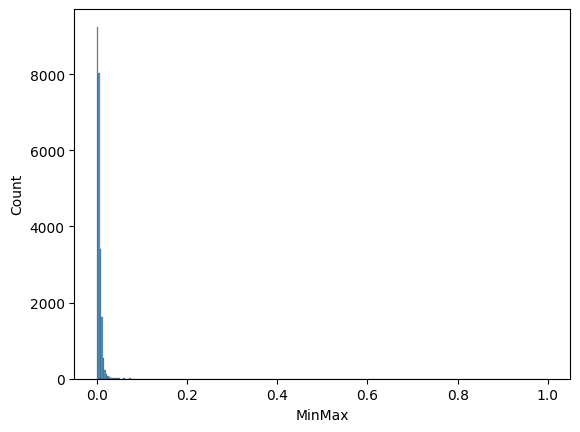

In [60]:
## Write your code here
import seaborn as sns
col = 'ConvertedCompYearly'
df['MinMax'] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
sns.histplot(df['MinMax'])

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


<Axes: xlabel='LogTransformed', ylabel='Count'>

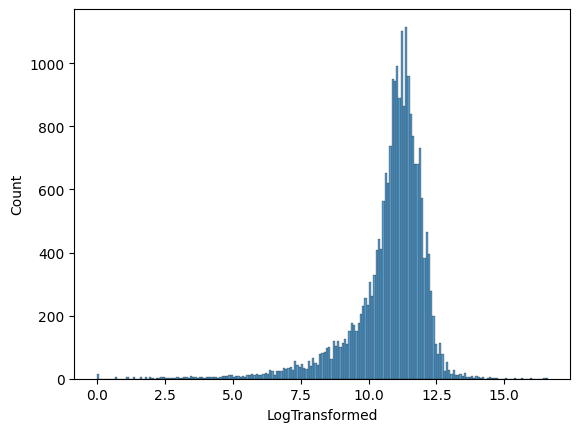

In [63]:
## Write your code here
import numpy as np
df['LogTransformed'] = np.log(df['ConvertedCompYearly'])
sns.histplot(df['LogTransformed'])

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


<Axes: xlabel='CodingYears', ylabel='Count'>

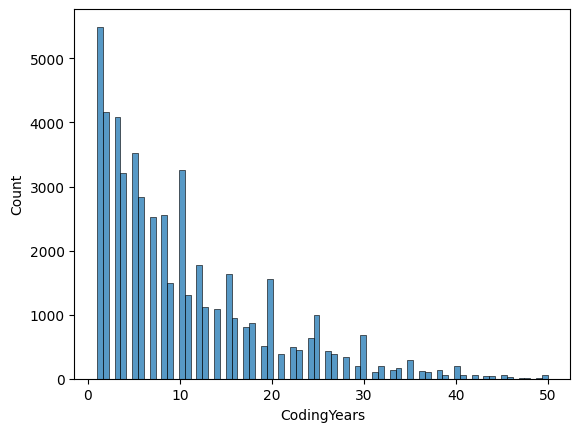

In [77]:
## Write your code here
# drop NAs; replace 'Less than 1 year' with 1, 'More than 50 years' with 50; convert to integer as new column CodingYears
df['CodingYears'] = df['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
# get some ideas from a histogram
sns.histplot(df['CodingYears'])

In [71]:
# use new column ExperienceLevel to do binning on CodingYears

# Define custom bin edges and labels
bins = [0, 2, 7, 20, 50]
levels = ["Beginner", "Intermediate", "Advanced", "Guru"]

# Apply binning and add the results to a new column
df['ExperienceLevel'] = pd.cut(df['CodingYears'], bins, labels=levels)
df['ExperienceLevel'].value_counts()

ExperienceLevel
Advanced        18918
Intermediate    16194
Beginner         9663
Guru             6835
Name: count, dtype: int64

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
